In [1]:
import pandas as pd

In [2]:
import numpy as np

### Зарузка данных

In [115]:
features = pd.read_csv('credit_train.csv', index_col='client_id', encoding='Windows-1251', sep=';')

### Преобразование данных в числовые

In [116]:
features['score_shk'] = features['score_shk'].str.replace(',', '.').astype(float)
features['credit_sum'] = features['credit_sum'].str.replace(',', '.').astype(float)

## Работа с пропусками

#### monthly_income редактирование пропуска

In [5]:
features = features.set_value(19640, 'monthly_income', 40000)

In [ ]:
pd.isnull(features).sum() > 0

### Работа с регионами

In [118]:
regions = pd.read_csv('regions.csv', encoding = 'Windows-1251', header = None)
regions = regions.drop([55,87])
regions = np.unique(regions[0].tolist())

#### Пропуски регионов конвертируем в текст

In [119]:
nans = features['living_region'][features['living_region'].isnull()].index.values
features['living_region'].ix[nans] = 'Na'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Приведение регионов к единому виду

In [120]:
for i in features.index.values:
    for k in regions:
        if k in features['living_region'].ix[i]:
            features = features.set_value(i, 'living_region', k)

In [121]:
features['living_region'] = features['living_region'].replace('74', 'ЧЕЛЯБИНСКАЯ')
features['living_region'] = features['living_region'].replace('98', 'САНКТ-ПЕТЕРБУРГ')
features['living_region'] = features['living_region'].replace('АДЫГЕЯ РЕСП', 'АДЫГЕЯ')
features['living_region'] = features['living_region'].replace('АЛТАЙСКИЙ КРАЙ', 'АЛТАЙСКИЙ')
features['living_region'] = features['living_region'].replace('АМУРСКАЯ ОБЛ', 'АМУРСКАЯ')
features['living_region'] = features['living_region'].replace('АМУРСКАЯ ОБЛАСТЬ', 'АМУРСКАЯ')
features['living_region'] = features['living_region'].replace('МЫТИЩИНСКИЙ Р-Н', 'МОСКОВСКАЯ')
features['living_region'] = features['living_region'].replace('ОРЁЛ', 'ОРЛОВСКАЯ')
features['living_region'] = features['living_region'].replace('РЕСПУБЛИКА САХА', 'ЯКУТИЯ')
features['living_region'] = features['living_region'].replace('РЕСП АЛТАЙ', 'РЕСПУБЛИКА АЛТАЙ')
features['living_region'] = features['living_region'].replace('МОСКВОСКАЯ ОБЛ', 'МОСКОВСКАЯ')
features['living_region'] = features['living_region'].replace('ОБЛ ОМСКАЯ', 'ОМСКАЯ')
features['living_region'] = features['living_region'].replace('ОМСКАЯ ОБЛ', 'ОМСКАЯ')
features['living_region'] = features['living_region'].replace('ОМСКАЯ ОБЛАСТЬ', 'ОМСКАЯ')
features['living_region'] = features['living_region'].replace('ГУСЬ-ХРУСТАЛЬНЫЙ', 'ВЛАДИМИРСКАЯ')
features['living_region'] = features['living_region'].replace('ЭВЕНКИЙСКИЙ', 'ЯКУТИЯ')
features['living_region'] = features['living_region'].replace('ДАЛЬНИЙ ВОСТОК', 'ХАБАРОВСК')
features['living_region'] = features['living_region'].replace('РОССИЯ', 'МОСКОВСКАЯ')
features['living_region'] = features['living_region'].replace('ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'НИЖЕГОРОДСК')
features['living_region'] = features['living_region'].replace('КАМЧАТС??ИЙ КРАЙ', 'КАМЧАТСК')
features['living_region'] = features['living_region'].replace('МОСКОВСКИЙ П', 'МОСКОВСКАЯ')
features['living_region'] = features['living_region'].replace('Г. ЧЕЛЯБИНСК', 'ЧЕЛЯБИНСКАЯ')

In [122]:
# редкие объединяем в один
features['living_region'] = features['living_region'].replace('ДАГЕСТАН', 'РЕДКИЙ РЕГИОН')
features['living_region'] = features['living_region'].replace('РЕСПУБЛИКА АЛТАЙ', 'РЕДКИЙ РЕГИОН')
features['living_region'] = features['living_region'].replace('ЧУКОТСКИЙ', 'РЕДКИЙ РЕГИОН')
features['living_region'] = features['living_region'].replace('ЧЕЧЕНСКАЯ', 'РЕДКИЙ РЕГИОН')
features['living_region'] = features['living_region'].replace('ИНГУШЕТИЯ', 'РЕДКИЙ РЕГИОН')
features['living_region'] = features['living_region'].replace('ГОРЬКОВСКАЯ', 'РЕДКИЙ РЕГИОН')
features['living_region'] = features['living_region'].replace('ЧИТИНСКАЯ', 'РЕДКИЙ РЕГИОН')

#### Сохранить/Загрузить изменения

In [124]:
# pd.DataFrame(features).to_csv('features_edit.csv', sep = ',', encoding = 'utf-8', index = True)

In [28]:
features1 = pd.read_csv('features_edit.csv', index_col='client_id')

In [4]:
features2 = pd.read_csv('features_edit_test.csv', index_col='client_id')

In [5]:
features3 = pd.concat([features1, features2])

In [79]:
features = features3.copy()

#### Кодирование названия регионов в процент взятия кредита в регионе

In [29]:
r1 = np.unique(features['living_region'].tolist())

In [30]:
for r2 in r1:
    features['living_region'][features['living_region'] == r2] = sum(features[features['living_region'] == r2]['open_account_flg'])*100/len(features[features['living_region'] == r2]['open_account_flg'])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Пропуски количества кредитов

In [18]:
features[pd.isnull(features['credit_count'])].head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
client_id,,,,,,,,,,,,,
170764,F,48,MAR,NOR,43990.0,24,1.40,0.626474,GRD,МОСКВА,50000,NaN,NaN
170766,M,24,UNM,UMN,50202.0,13,1.90,0.688540,GRD,САНКТ-ПЕТЕРБУРГ,45000,NaN,NaN
170786,F,40,DIV,SPC,16008.0,10,1.10,0.471497,GRD,БРЯНСК,15000,NaN,NaN
170832,F,26,UNM,SPC,5080.0,7,1.00,0.579632,GRD,АСТРАХАНСКАЯ,10500,NaN,NaN
170842,M,41,MAR,SPC,21591.0,10,1.16,0.577719,SCH,МОСКОВСКАЯ,45000,NaN,NaN


### Преобразование признаков

In [31]:
features = features.replace('M', 1)
features = features.replace('F', 0)

In [32]:
features = features.replace('SCH', 1)
features = features.replace('GRD', 3)
features = features.replace('UGR', 2)
features = features.replace('PGR', 4)
features = features.replace('ACD', 5)
# попробовать есть образование - 1, нет образования - 0

In [54]:
features['job_position'] = features['job_position'].replace('ONB', 'INV')

In [13]:
features['job_position'].value_counts()

SPC    207240
UMN     27135
BIS      8627
PNA      6317
DIR      5766
ATP      4255
WRK      1000
NOR       857
WOI       552
INP       365
BIU       189
WRP       166
PNI       103
PNV        63
HSK        23
PNS        19
INV         9
Name: job_position, dtype: int64

#### Ошибки в 'score_shk'

In [33]:
features['score_shk'][features['score_shk'] > 1] = features['score_shk'][features['score_shk'] > 1] - 1

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### 1. Кодирование категориальных (LabelEncoder)

In [16]:
from sklearn import preprocessing

In [17]:
le = preprocessing.LabelEncoder()

In [18]:
le.fit(features['job_position'])
features['job_positionU'] = le.transform(features['job_position'])

In [19]:
le.fit(features['marital_status'])
features['martial_statusU'] = le.transform(features['marital_status'])

#### 2. Кодирование категориальных (Dummies)

In [34]:
marital_statusU = pd.get_dummies(features['marital_status'])
features = pd.concat([features.drop('marital_status', axis = 1), marital_statusU], axis = 1)

In [35]:
job_positionU = pd.get_dummies(features['job_position'])
features = pd.concat([features.drop('job_position', axis = 1), job_positionU], axis = 1)

#### Изменение признака Tarif дамми_кодирование или лэйбл_энкодинг

In [36]:
features['tariff_id'] = features['tariff_id'].replace('.', ',').astype(str)

In [37]:
tariff_idU = pd.get_dummies(features['tariff_id'])
features = pd.concat([features.drop('tariff_id', axis = 1), tariff_idU], axis = 1)

#### Соединение трейна и теста для предсказания количества кредитов и количества просроченных

In [13]:
#features1 = features.copy()

In [27]:
#features2 = features.copy()

In [89]:
features = features[:170746]

#### Скалирование признаков

In [14]:
from sklearn.preprocessing import scale

In [15]:
s = ['age','credit_sum','credit_month','score_shk','education','living_region','monthly_income']

In [167]:
s = ['credit_count', 'overdue_credit_count', 'age', 'credit_month', 'credit_sum', 'education', 'gender', 
     'living_region', 'monthly_income', 'score_shk', 'CIV', 'DIV', 'MAR', 'UNM', 'WID', 'ATP', 'BIS', 
     'BIU','DIR', 'HSK', 'INP', 'INV', 'NOR', 'ONB', 'PNA', 'PNI', 'PNS', 'PNV','SPC', 'UMN', 'WOI', 
     'WRK', 'WRP', '1.0', '1.1', '1.16', '1.17', '1.18','1.19', '1.2', '1.21', '1.22', '1.23', '1.24', 
     '1.25', '1.26', '1.27','1.28', '1.29', '1.3', '1.32', '1.4', '1.41', '1.43', '1.44', '1.48','1.5', 
     '1.52', '1.56', '1.6', '1.7', '1.9', '1.91', '1.94', '1.96']

In [16]:
X_scaler = scale(X[s])

In [17]:
# X_s = pd.DataFrame(X_scaler.fit_transform(X=features[s],y=None), columns=s, index=features.index.values)

In [17]:
X2 = pd.DataFrame(X_scaler, columns=s, index=X.index.values)

In [18]:
#X2 = pd.concat([X.drop(s, axis = 1), X_s], axis = 1)

#### Восстановление пропущенных "количество кредитов" и "количество просроченных кредитов"

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
neigh = NearestNeighbors(n_neighbors=1)

In [22]:
nanki = features[pd.isnull(features['credit_count'])].index.values

In [23]:
samples = features.drop(nanki).drop(['credit_count','overdue_credit_count','open_account_flg'], axis=1)

In [24]:
points = features.ix[nanki].drop(['credit_count','overdue_credit_count','open_account_flg'], axis=1)

In [25]:
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [26]:
for i in nanki:
    
    ind = neigh.kneighbors(points.ix[[i]])[1][0]
    idn = samples.iloc[ind].index.values[0]
    
    features.set_value(i, 'credit_count', features['credit_count'].ix[idn])
    features.set_value(i, 'overdue_credit_count', features['overdue_credit_count'].ix[idn])

In [27]:
features_a = features[['credit_count','overdue_credit_count']]

In [38]:
features_b = features.drop(['credit_count','overdue_credit_count'], axis=1)

In [39]:
features = pd.concat([features_a,features_b], axis = 1)

#### Сохранить

In [ ]:
### to_csv('features_experiment.csv' финал простого преобразования тренировочной выборки

In [40]:
pd.DataFrame(features).to_csv('features_ab200000.csv', sep = ',', encoding = 'utf-8', index = True)

In [106]:
features = pd.read_csv('features_ab200000.csv', index_col='client_id')

### Создание новых признаков

#### Разница заработной платы и суммы кредита

In [100]:
features['f1'] = features['monthly_income'] - features['credit_sum']

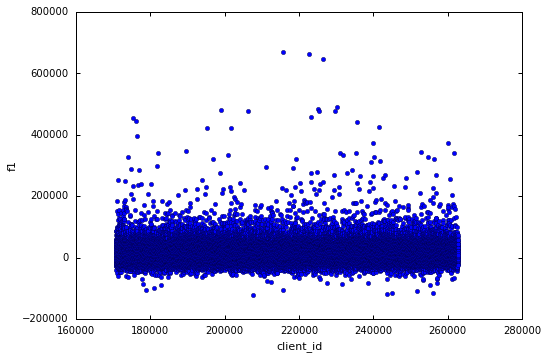

In [116]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plt.figure()
features2.reset_index().plot.scatter(x = 'client_id', y = 'f1')

In [101]:
features['f1_out_hi'] = 0
features['f1_out_hi'].ix[features['f1'] > 57849.165000000001] = 1
#features['f1'][features['f1'] > 57849.165000000001] = 58849

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
features['f1_out_lo'] = 0
features['f1_out_lo'].ix[features['f1'] < -32359.275000000001] = -1
#features['f1'][features['f1'] < -32359.275000000001] = -33359

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
features = features.drop('f1', axis=1) # удалить эту фигню

#### удаление выбросов

In [103]:
features = features[features['f1_out_hi'] == 0]

In [104]:
features = features[features['f1_out_lo'] == 0]

In [85]:
len(features)

170746

In [95]:
len(features)

163306

### Удаление/индикация выбросов и редких категориальных значений

#### визуализация выбросов

In [75]:
#features['credit_sum_out'] = 0
#features['credit_sum_out'].ix[features['credit_sum'] > 100000] = 1
features['credit_sum'][features['credit_sum'] > 110000] = 120000

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [76]:
#features['monthly_income_out'] = 0
#features['monthly_income_out'].ix[features['monthly_income'] > 350000] = 1
features['monthly_income'][features['monthly_income'] > 350000] = 360000

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


#### Новый признак из количества кредитов и просроченных кредитов (бинаризовать)

#### Кластеризация

In [49]:
from sklearn.cluster import KMeans

In [50]:
Clust = KMeans(n_clusters = 400, random_state = 245)  # 9

In [ ]:
Clust.fit(X)

In [77]:
# X2 = X1.copy()

In [81]:
X['Labels_15'] = Clust.labels_

In [82]:
Labels_15 = pd.get_dummies(X['Labels_15'])
X = pd.concat([X.drop('Labels_15', axis = 1), Labels_15], axis = 1)

#### Попробовать регрессию

In [130]:
from sklearn.linear_model import  LogisticRegression

In [131]:
grid = {'penalty' : ['l2','l1']}
cv1 = KFold(y.size, n_folds=5, shuffle=True, random_state=241)
clf = LogisticRegression()
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=cv1)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=153866, n_folds=5, shuffle=True, random_state=241),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1']}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [154]:
X['regress_proba'] = gs.predict_proba(X)[:, 0]

In [34]:
X = features.drop(['open_account_flg','marital_status','job_position'], axis=1).dropna() # for labelencoding

In [41]:
X = features.drop(['open_account_flg'], axis=1)                                          # for dummie

In [42]:
y = features['open_account_flg'].ix[X.index.values]

In [43]:
import xgboost as xgb

In [44]:
from sklearn.cross_validation import KFold

In [45]:
from sklearn.grid_search import GridSearchCV

In [246]:
grid = {'n_estimators': [449], 'max_depth': [4], 'learning_rate': [0.1]}
cv1 = KFold(y.ix[X_n.dropna().index.values].size, n_folds=5, shuffle=True, random_state=241)
clf = xgb.XGBClassifier(seed=202)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=cv1)
gs.fit(X.ix[X_n.dropna().index.values], y.ix[X_n.dropna().index.values])

GridSearchCV(cv=sklearn.cross_validation.KFold(n=2127, n_folds=5, shuffle=True, random_state=241),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=202, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1], 'n_estimators': [449], 'max_depth': [4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [247]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 449}

In [248]:
gs.best_score_

0.61513811350137459

In [ ]:
0.76580886466127318  # 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 449

In [ ]:
0.76562988858712167

In [ ]:
0.75735119584209576  # скор при лэйбл_энкодинге

In [ ]:
0.75797312676343076  # скор при дамми_кодировании

In [ ]:
0.75723750067637552  # скор с добавлением разницы зп и кредита (без удаления колонок зп и кредита)

In [ ]:
0.7487039157523776   # скор с добавлением разницы зп и кредита (c удаления колонок зп и кредита)

In [ ]:
0.75765643297070107  # скор после удаления выбросов credit_sum и monthly_income {'max_depth': 4, 'n_estimators': 500}

In [ ]:
0.75801138622480213  # тариф дамми_кодирование

In [ ]:
0.75849001460375842  # объединение редких регионов

In [ ]:
0.75880321777591353  # удалил выбросы от f1       (закодировать 1, 0, -1 или Scaling data with outliers)

In [ ]:
0.75880291554905732  # скалирование значений не помогло для бустинга, надежда на к-среднее

In [ ]:
0.7588296938961725   # повторное

In [ ]:
# Кластеризация 3, 7, 14 кластеров

In [48]:
from sklearn import cross_validation

In [59]:
from sklearn.metrics import roc_auc_score

In [54]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=241)

In [55]:
clf = GradientBoostingClassifier(max_depth=4, n_estimators=500)

In [56]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [57]:
y_score = clf.predict(X_test)

In [60]:
roc_auc_score(y_test, y_score)

0.54954060625983259

In [68]:
imp = pd.DataFrame(clf.feature_importances_, index=X.columns.values)[pd.DataFrame(clf.feature_importances_, index=X.columns.values)[0]>0]

In [ ]:
imp.sort_values(0)[imp.sort_values(0)[0]>0.001]

In [98]:
imp.sort_values(0)[imp.sort_values(0)[0]>0.001].index.values

array(['1.24', '1.0', 'PNV', '1.2', 14, 'PNS', 'BIU', '1.25', 13, 'INP',
       '1.21', 10, 'WID', 8, 7, 'PNI', 'INV', '1.19', 4, '1.9', '1.29',
       '1.7', 'WOI', '1.17', 3, 'UNM', 'CIV', 11, 0, 'BIS', 6, '1.43',
       '1.44', '1.91', '1.16', 'DIR', '1.5', 1, 'NOR', 5, 'UMN', 'DIV',
       'ATP', '1.18', 'SPC', 12, 'WRK', 'overdue_credit_count', 'MAR',
       '1.6', '1.4', '1.3', 'gender', 'PNA', '1.1', 'education', '1.32',
       'credit_count', 'credit_month', 'monthly_income', 'living_region',
       'age', 'score_shk', 'credit_sum'], dtype=object)

In [47]:
import xgboost as xgb

In [48]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=0, silent=True,
       subsample=1)

In [60]:
grid = {'n_estimators': [500], 'max_depth': [4]}
cv1 = KFold(y.size, n_folds=5, shuffle=True, random_state=241)
clf = xgb.XGBClassifier(max_depth=4, n_estimators=500)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=cv1)
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=162797, n_folds=5, shuffle=True, random_state=241),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, n_estimators=500,
       nthread=-1, objective='binary:logistic', seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_depth': [4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [47]:
gs.best_score_

0.76509065872925996

### Немного кластеризации

In [170]:
from sklearn.cluster import KMeans

In [171]:
Clust = KMeans(n_clusters = 400, random_state = 245)

In [172]:
Clust.fit(X2)   #pd.concat([samples3.ix[X2.index.values], X2], axis = 1)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=400, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=245, tol=0.0001,
    verbose=0)

In [204]:
X3 = X.copy()

In [205]:
X3['Labels900'] = Clust.labels_

In [219]:
Labels900 = pd.get_dummies(X3['Labels900'])
X3 = pd.concat([X3.drop('Labels900', axis = 1), Labels900], axis = 1)